## Country Region Join

This notebook loads the cleaned Netflix dataset and merges it with a country-to-region lookup table.

The purpose of this merge is to enrich the dataset with geographic region information for further analysis.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from pathlib import Path
import os

# Set working directory to project root
repo = Path(r"C:\Users\17789\Desktop\Babi4005_Project")

os.chdir(repo)
print("Now running from:", Path.cwd())

Now running from: C:\Users\17789\Desktop\Babi4005_Project


## Load Cleaned Dataset and Lookup Table

We load:
- The cleaned Netflix dataset from `clean_data/`
- The country-to-region lookup dataset from `docs/`

Relative paths are used so the project can run on any machine.

In [8]:
netflix = pd.read_csv("clean_data/netflix_clean.csv")
lookup = pd.read_csv("docs/country_region_lookup.csv")

print("Netflix shape:", netflix.shape)
print("Lookup shape:", lookup.shape)

netflix.head()

Netflix shape: (7777, 12)
Lookup shape: (39, 2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,2019-01-05,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,2016-03-01,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,Unknown,David Attenborough,United Kingdom,2018-12-03,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


## Merge Strategy

We perform a **LEFT merge** on the `country` column.

Why LEFT?

- The Netflix dataset is our primary dataset.
- We want to retain all Netflix titles.
- If a country does not exist in the lookup table, the `region` column will contain NA values.

This allows us to measure unmatched countries after the merge.


In [11]:
merged = pd.merge(
    netflix,
    lookup,
    how="left",
    on="country",
    validate="m:1",     # many Netflix rows to one country row
    indicator=True      # helps inspect merge behavior
)

print("Merged shape:", merged.shape)

print("\nMerge indicator counts:")
print(merged["_merge"].value_counts())

Merged shape: (7777, 14)

Merge indicator counts:
_merge
both          6467
left_only     1310
right_only       0
Name: count, dtype: int64


## Merge Results Interpretation

The `_merge` indicator shows:

- both → successful matches
- left_only → Netflix rows with no country match
- right_only → lookup rows with no Netflix match

Since we used a LEFT join, we expect:
- no right_only rows
- LEFT join creates NA in region for unmatched countries (left_only).

## Check Missing Region Values

In [12]:
missing_region = merged["region"].isna().sum()

print("Number of rows with missing region:", missing_region)

Number of rows with missing region: 1310


### Remove Indicator Column

In [13]:
merged = merged.drop(columns=["_merge"])

## Save Output

In [15]:
merged.to_csv("results/netflix_with_region.csv", index=False)

print("Merged dataset saved to results/netflix_with_region.csv")

Merged dataset saved to results/netflix_with_region.csv


The enriched dataset is saved to the `results/` folder.

## Small Analysis

In [18]:
region_counts = merged["region"].value_counts()
region_counts

region
North America    2826
Asia             1766
Europe            907
Unknown           506
Africa            198
South America     171
Oceania            93
Name: count, dtype: int64

<Axes: title={'center': 'Netflix Titles by Region'}, xlabel='region'>

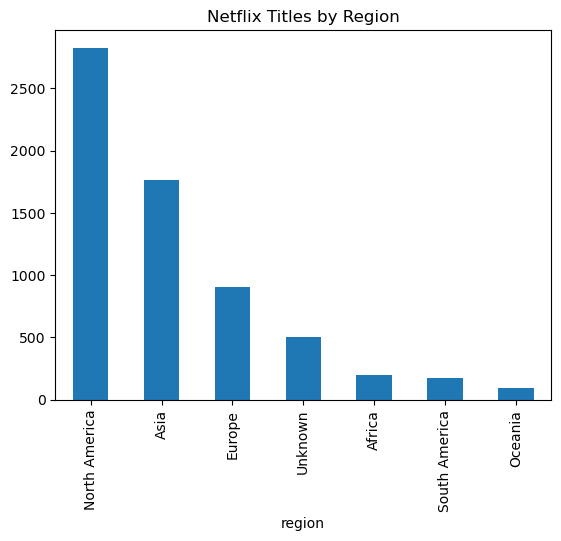

In [17]:
region_counts.plot(kind="bar", title="Netflix Titles by Region")

### Interpretation

North America contains the highest number of Netflix titles in the dataset, which is expected given the strong presence of U.S. content on the platform.

Asia and Europe also represent significant portions of the catalog, reflecting Netflix’s global expansion strategy.

The presence of "Unknown" indicates entries where the country field was either missing or did not match exactly with the lookup table. 
This highlights a common real-world data issue: inconsistent or multi-country formatting.

Overall, the merge successfully enriched the dataset with geographic context, allowing for regional analysis of content distribution.